# SVM for classification


Load IRIS dataset, check its contents:


In [219]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:


In [220]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=8)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [221]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear', random_state=8)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now.

- Choose only first two features (columns) of iris.data
- SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data


In [222]:
X = iris.data[:, :2]
y = iris.target
X, y = X[y != 2], y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:


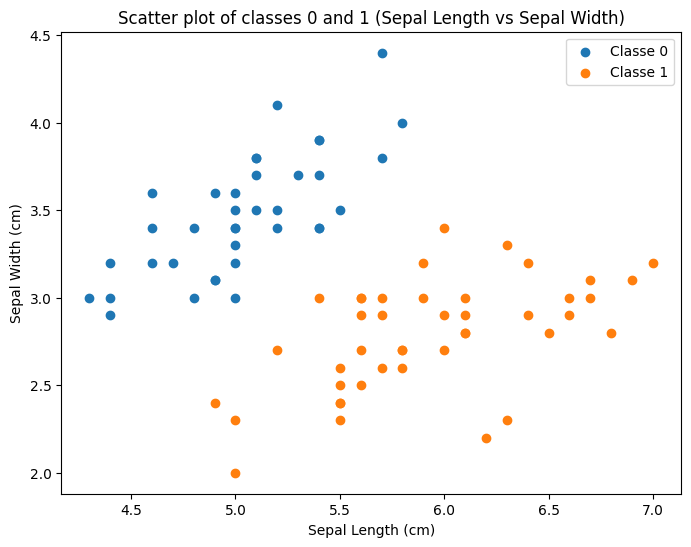

In [223]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label="Classe 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label="Classe 1")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter plot of classes 0 and 1 (Sepal Length vs Sepal Width)")
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)


In [224]:
from sklearn.metrics import accuracy_score

print(f"Training SVM with default value of C")
SVMmodel = SVC(kernel='linear', random_state=8)
SVMmodel.fit(X_train, y_train)
y_pred = SVMmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for default value of C: {accuracy:.2f}\n")

print(f"Training SVM with C=200")
SVMmodel = SVC(kernel='linear', C=200, random_state=8)
SVMmodel.fit(X_train, y_train)
y_pred = SVMmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for C=200: {accuracy:.2f}\n")


Training SVM with default value of C
Accuracy for default value of C: 0.95

Training SVM with C=200
Accuracy for C=200: 1.00



Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]\*[x0 x1] + b = 0:


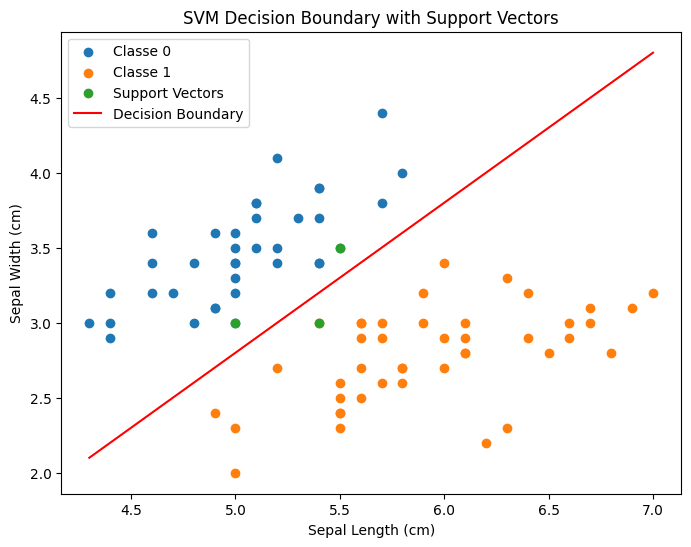

In [226]:
import numpy as np

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label="Classe 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label="Classe 1")
plt.scatter(supvectors[:, 0], supvectors[:, 1], label="Support Vectors")

#Separating line coefficients:
W=SVMmodel.coef_.ravel()
b=SVMmodel.intercept_[0]

x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_vals = -(W[0] * x_vals + b) / W[1]
plt.plot(x_vals, y_vals, 'r-', label="Decision Boundary")

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("SVM Decision Boundary with Support Vectors")
plt.legend()
plt.show()




# Anomaly detection via SVM


Import one-class SVM and generate data (Gaussian blobs in 2D-plane):


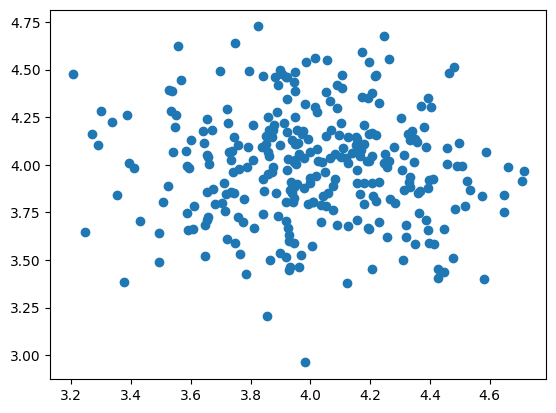

In [227]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)


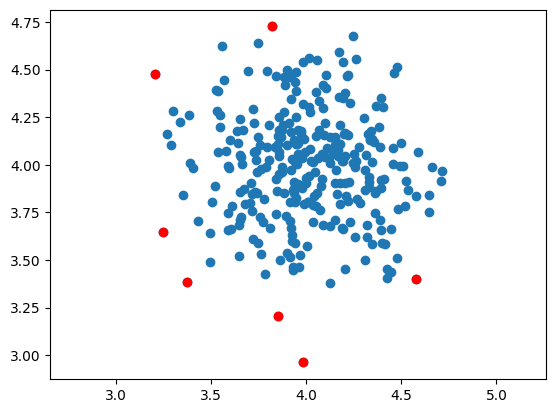

In [228]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:


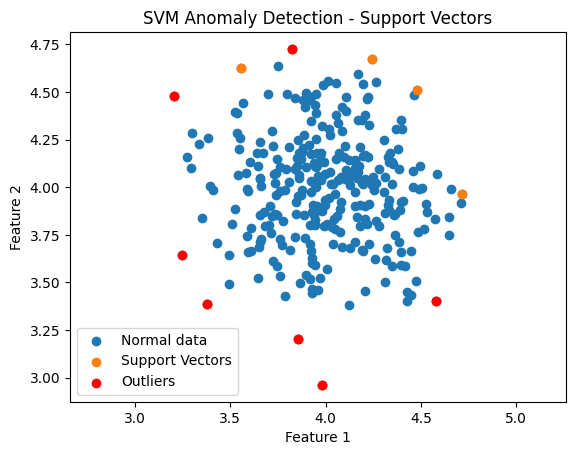

In [229]:
support_vectors = SVMmodelOne.support_vectors_
plt.scatter(x[:, 0], x[:, 1], label="Normal data")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], label="Support Vectors")
plt.scatter(values[:, 0], values[:, 1], color='red', label="Outliers")
plt.axis('equal')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Anomaly Detection - Support Vectors")
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.


8.989098620408397


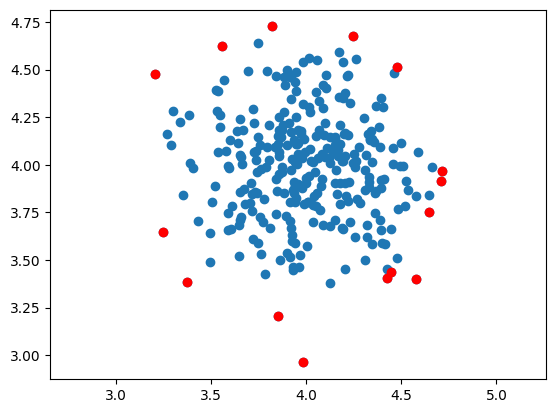

In [230]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()